
#<b>NLTK</b>
---


In [1]:
import nltk
#import tokenize

import pandas as pd 



from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from urllib import request
url = "http://www.gutenberg.org/files/55456/55456-0.txt"

response = request.urlopen(url)
text = response.read().decode('utf8')
type(text)

dataset= pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/S3_NLP/alice.txt')
#text_2 = read("/content/drive/MyDrive/Colab Notebooks/S3_NLP/alice.txt").decode('utf8')

#print(text[2280:])
text = text[2280:]

In [2]:
dataset

,CHAPITRE PREMIER.
0,AU FOND DU TERRIER.
1,"ALICE, assise auprès de sa sœur sur le gazon, ..."
2,de rester là à ne rien faire; une ou deux fois...
3,yeux sur le livre que lisait sa sœur; mais quo...
4,"dialogues! ""La belle avance,"" pensait Alice, ""..."
...,...
2669,"étranges, et peut-être même en leur contant le..."
2670,Merveilles du temps jadis: elle la voyait part...
2671,chagrins et trouver plaisir à leurs innocentes...
2672,propre enfance et les heureux jours d'été.


### TOKENISATION
---

In [3]:
nltk.download('punkt')
#print(word_tokenize(text))
full_text = word_tokenize(text)
#full_text[376:]
#extracted_body = full_text[376:]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### STOP WORDS
---

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
stop_words = stopwords.words('french')

In [6]:
token = word_tokenize(text)
cleaned_token = []
for word in token:
    if word not in stop_words:
        cleaned_token.append(word)

In [7]:
#Counter(cleaned_token)
print("The original dictionnary :", "\n", token[:50])
print('\n')
print("The cleaned dictionnary :", "\n", cleaned_token[:50])
#token[:50]


The original dictionnary : 
 ['Notre', 'barque', 'glisse', 'sur', "l'onde", 'Que', 'dorent', 'de', 'brûlants', 'rayons', ';', 'Sa', 'marche', 'lente', 'et', 'vagabonde', 'Témoigne', 'que', 'des', 'bras', 'mignons', ',', 'Pleins', "d'ardeur", ',', 'mais', 'encore', 'novices', ',', 'Tout', 'fiers', 'de', 'ce', 'nouveau', 'travail', ',', 'Mènent', 'au', 'gré', 'de', 'leurs', 'caprices', 'Les', 'rames', 'et', 'le', 'gouvernail', '.', 'Soudain', 'trois']


The cleaned dictionnary : 
 ['Notre', 'barque', 'glisse', "l'onde", 'Que', 'dorent', 'brûlants', 'rayons', ';', 'Sa', 'marche', 'lente', 'vagabonde', 'Témoigne', 'bras', 'mignons', ',', 'Pleins', "d'ardeur", ',', 'encore', 'novices', ',', 'Tout', 'fiers', 'nouveau', 'travail', ',', 'Mènent', 'gré', 'leurs', 'caprices', 'Les', 'rames', 'gouvernail', '.', 'Soudain', 'trois', 'cris', 'font', 'entendre', ',', 'Cris', 'funestes', 'langueur', 'Dont', 'pouvais', 'défendre', 'Par', 'temps']


### STEMMING
---


In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

####### TESTING THE PORTER STEMMER ################################
test1 = ['play', 'playing', 'plays', 'played',
         'playfullness']
stemmed = [stemmer.stem(word) for word in test1]
print(stemmed)



test2 = ['univers', 'university', 'universal']
stemmed = [stemmer.stem(word) for word in test2]
print(stemmed)

['play', 'play', 'play', 'play', 'playful']
['univ', 'univers', 'univers']


In [9]:
from nltk.stem import LancasterStemmer

stemmer_L = LancasterStemmer()

####### TESTING THE LANCASTER STEMMER ################################
test1 = ['play', 'playing', 'plays', 'played',
         'playfullness']
stemmed = [stemmer_L.stem(word) for word in test1]
print(stemmed)

test2 = ['univers', 'university', 'universal']
stemmed = [stemmer_L.stem(word) for word in test2]
print(stemmed)


['play', 'play', 'play', 'play', 'playful']
['un', 'univers', 'univers']


In [10]:
from nltk.stem import SnowballStemmer

stemmer_S = SnowballStemmer(language = 'english')

####### TESTING THE LANCASTER STEMMER ################################
test1 = ['play', 'playing', 'plays', 'played',
         'playfullness']
stemmed = [stemmer_S.stem(word) for word in test1]
print(stemmed)

test2 = ['univers', 'university', 'universal']
stemmed = [stemmer_S.stem(word) for word in test2]
print(stemmed)


['play', 'play', 'play', 'play', 'playful']
['univ', 'univers', 'univers']


In [11]:
#################### LET'S STEM THE CLEANED TEXT #########################

#stemmer = PorterStemmer()

# WITH THE LANCASTER STEMMER ################################

stemmed = [stemmer.stem(word) for word in cleaned_token]
print(stemmed)



['notr', 'barqu', 'gliss', "l'ond", 'que', 'dorent', 'brûlant', 'rayon', ';', 'Sa', 'march', 'lent', 'vagabond', 'témoign', 'bra', 'mignon', ',', 'plein', "d'ardeur", ',', 'encor', 'novic', ',', 'tout', 'fier', 'nouveau', 'travail', ',', 'mènent', 'gré', 'leur', 'capric', 'le', 'rame', 'gouvernail', '.', 'soudain', 'troi', 'cri', 'font', 'entendr', ',', 'cri', 'funest', 'langueur', 'dont', 'pouvai', 'défendr', 'par', 'temp', 'chaud', ',', 'rend', 'rêveur', '.', '``', 'Un', 'cont', '!', 'Un', 'cont', '!', "''", 'disent-el', 'tout', "d'une", 'commun', 'voix', '.', 'Il', 'fallait', 'céder', 'cruell', ';', 'que', 'pouvais-j', ',', 'héla', '!', 'contr', 'troi', '?', 'La', 'premièr', ',', "d'un", 'suprêm', ',', 'donn', "l'ordr", 'commenc', '.', 'La', 'second', ',', 'douceur', ',', 'Se', 'content', 'demand', 'de', 'chose', 'croir', '.', 'nou', 'interrompu', 'par', 'troisièm', ',', "c'est", 'notoir', ',', "qu'un", 'foi', 'minut', ',', 'plu', '.', 'pui', ',', 'muett', ',', 'prêtant', "l'oreil",

### LEMMATIZATION
---


In [12]:
from nltk.stem import 	WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
wordnet_lemmatizer = WordNetLemmatizer()
text_to_lem = cleaned_token
for w in text_to_lem:
  print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Lemma for Roi is Roi
Lemma for empressement is empressement
Lemma for . is .
Lemma for Et is Et
Lemma for continua is continuum
Lemma for répéter is répéter
Lemma for demi-voix is demi-voix
Lemma for : is :
Lemma for '' is ''
Lemma for Très-important is Très-important
Lemma for , is ,
Lemma for peu is peu
Lemma for important is important
Lemma for , is ,
Lemma for peu is peu
Lemma for important is important
Lemma for , is ,
Lemma for très-important is très-important
Lemma for ; is ;
Lemma for '' is ''
Lemma for comme is comme
Lemma for essayer is essayer
Lemma for lequel is lequel
Lemma for deux is deux
Lemma for mieux is mieux
Lemma for sonnant is sonnant
Lemma for . is .
Lemma for Quelques-uns is Quelques-uns
Lemma for jurés is jurés
Lemma for écrivirent is écrivirent
Lemma for `` is ``
Lemma for très-important is très-important
Lemma for , is ,
Lemma for '' is ''
Lemma for d'autres is d'autres
Lemma for , 

#<b>SPACY</b>
---

### SET UP
---


In [16]:
import spacy.cli
import re
spacy.cli.download("fr_core_news_md")

nlp = spacy.load('fr_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [17]:
doc = nlp(text)

In [19]:
############ CHAPTER SEGMENTATION ##############################

###### BEGINNING OF TEXT ######################
doc2 = text.replace(text[0:text.find('CHAPITRE PREMIER')], "")

###### END OF TEXT ############################
doc3 = doc2.replace(doc2[doc2.find('FIN'):len(doc2)], "")

###### CHAPTER SELECTED #######################
chap_split = re.split("CHAPITRE", doc3)

###### !!!! RE.SPLIT because "list has no attribute SPLIT" !!!! ############################

#doc_test = nlp(chap_split)
chap_split

['',
 ' PREMIER.\r\n\r\nAU FOND DU TERRIER.\r\n\r\n\r\nALICE, assise auprès de sa sœur sur le gazon, commençait à s\'ennuyer\r\nde rester là à ne rien faire; une ou deux fois elle avait jeté les\r\nyeux sur le livre que lisait sa sœur; mais quoi! pas d\'images, pas de\r\ndialogues! "La belle avance," pensait Alice, "qu\'un livre sans images,\r\nsans causeries!".\r\n\r\nElle s\'était mise à réfléchir, (tant bien que mal, car la chaleur du\r\njour l\'endormait et la rendait lourde,) se demandant si le plaisir de\r\nfaire une couronne de marguerites valait bien la peine de se lever et\r\nde cueillir les fleurs, quand tout à coup un lapin blanc aux yeux roses\r\npassa près d\'elle.\r\n\r\nIl n\'y avait rien là de bien étonnant, et Alice ne trouva même pas\r\ntrès-extraordinaire d\'entendre parler le Lapin qui se disait: "Ah!\r\nj\'arriverai trop tard!" (En y songeant après, il lui sembla bien\r\nqu\'elle aurait dû s\'en étonner, mais sur le moment cela lui avait paru\r\ntout naturel.) Cepe

In [21]:
df_chap_split = pd.DataFrame(chap_split)
df_chap_split

,0
0,
1,PREMIER.\r\n\r\nAU FOND DU TERRIER.\r\n\r\n\r...
2,II.\r\n\r\nLA MARE AUX LARMES.\r\n\r\n\r\n[Il...
3,III.\r\n\r\nLA COURSE COCASSE.\r\n\r\n\r\nILS...
4,IV.\r\n\r\nL'HABITATION DU LAPIN BLANC.\r\n\r...
5,V.\r\n\r\nCONSEILS D'UNE CHENILLE.\r\n\r\n\r\...
6,VI.\r\n\r\nPORC ET POIVRE.\r\n\r\n\r\nALICE r...
7,VII.\r\n\r\nUN THÉ DE FOUS.\r\n\r\n\r\nIL y a...
8,VIII.\r\n\r\nLE CROQUET DE LA REINE.\r\n\r\n\...
9,IX.\r\n\r\nHISTOIRE DE LA FAUSSE-TORTUE.\r\n\...


In [22]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [23]:
from textblob import TextBlob
nltk.download('averaged_perceptron_tagger')

chapters = pd.DataFrame({'tags':[TextBlob(chap_split[i]).pos_tags 
                                 for i in range(df_chap_split.shape[0])]})

word_counts = []
pos_counts = {}

for headline in chapters['tags']:
  word_counts.append(len(headline))
  for tag in headline:
    if tag[1] in pos_counts:
      pos_counts[tag[1]] += 1
    else: pos_counts[tag[1]] = 1

#word_counts
pos_counts
#chapters

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


{'CC': 482,
 'CD': 17,
 'DT': 71,
 'FW': 2640,
 'IN': 818,
 'JJ': 3431,
 'JJR': 37,
 'JJS': 166,
 'MD': 14,
 'NN': 11440,
 'NNP': 3195,
 'NNPS': 6,
 'NNS': 1531,
 'POS': 31,
 'PRP': 91,
 'PRP$': 2,
 'RB': 192,
 'RBR': 14,
 'RBS': 3,
 'RP': 2,
 'UH': 37,
 'VB': 177,
 'VBD': 197,
 'VBN': 6,
 'VBP': 722,
 'VBZ': 632,
 'WDT': 2,
 'WP': 4}

{'NN': 11440, 'JJ': 3431, 'NNP': 3195, 'FW': 2640, 'NNS': 1531, 'IN': 818, 'VBP': 722, 'VBZ': 632, 'CC': 482, 'VBD': 197, 'RB': 192, 'VB': 177, 'JJS': 166, 'PRP': 91, 'DT': 71, 'UH': 37, 'JJR': 37, 'POS': 31, 'CD': 17, 'RBR': 14, 'MD': 14, 'VBN': 6, 'NNPS': 6, 'WP': 4, 'RBS': 3, 'WDT': 2, 'RP': 2, 'PRP$': 2}


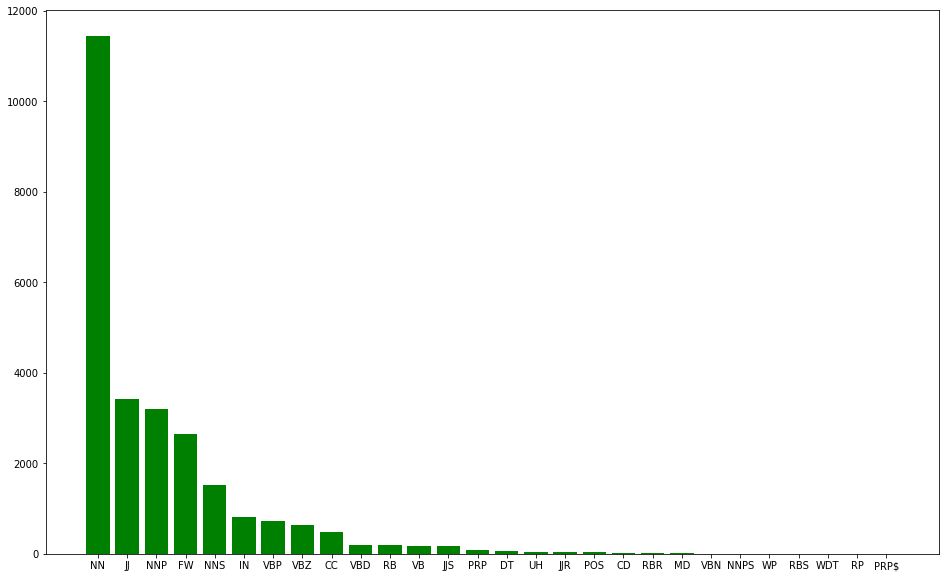

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

#dict1 = {1: 1, 2: 9, 3: 4}
sorted_pos = {}
sorted_keys = sorted(pos_counts, key=pos_counts.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_pos[w] = pos_counts[w]

print(sorted_pos) # {1: 1, 3: 4, 2: 9}

#pos_counts = pos_counts.sort_values()

plt.bar(list(sorted_pos.keys()), sorted_pos.values(), color='g')
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

#### SPACY MODULE STOPWORDS INSIDE : ####
stopped = stopwords.words('french')
count_vectorizer = CountVectorizer(stop_words=stopped, max_features=40000)
text_sample = chap_split

#count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
#text_sample = reindexed_data.sample(n=10000, random_state=0).as_matrix()

print('Headline before vectorization: {}'.format(text_sample[1]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Headline after vectorization: \n{}'.format(document_term_matrix[1]))

Headline before vectorization:  PREMIER.

AU FOND DU TERRIER.


ALICE, assise auprès de sa sœur sur le gazon, commençait à s'ennuyer
de rester là à ne rien faire; une ou deux fois elle avait jeté les
yeux sur le livre que lisait sa sœur; mais quoi! pas d'images, pas de
dialogues! "La belle avance," pensait Alice, "qu'un livre sans images,
sans causeries!".

Elle s'était mise à réfléchir, (tant bien que mal, car la chaleur du
jour l'endormait et la rendait lourde,) se demandant si le plaisir de
faire une couronne de marguerites valait bien la peine de se lever et
de cueillir les fleurs, quand tout à coup un lapin blanc aux yeux roses
passa près d'elle.

Il n'y avait rien là de bien étonnant, et Alice ne trouva même pas
très-extraordinaire d'entendre parler le Lapin qui se disait: "Ah!
j'arriverai trop tard!" (En y songeant après, il lui sembla bien
qu'elle aurait dû s'en étonner, mais sur le moment cela lui avait paru
tout naturel.) Cependant, quand le Lapin vint à tirer une montre de
s

In [26]:
from sklearn.decomposition import TruncatedSVD

n_topics = 12

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)




In [27]:
print(lsa_topic_matrix)
#lsa_topic_matrix = np.delete(lsa_topic_matrix, 0)


[[ -0.          -0.           0.          -0.          -0.
   -0.           0.          -0.          -0.           0.
    0.          -0.        ]
 [ 54.75680013  32.78745227  -5.78940912   0.4052265   -7.87383281
   -4.31189836   7.06943989   7.80659294 -19.13335337  -5.54612108
   13.7249868   21.19586823]
 [ 59.29305285  29.41349699 -10.48205952   0.45396298  -6.76896385
    2.61385133  -0.69595372  22.82658687 -11.69189777  -5.78591043
  -16.76999372 -17.5926687 ]
 [ 51.62753199   3.2708426   -0.24842734   5.52370308  -2.63245939
    9.39927813  -7.0190144   26.59588045  27.84712914   6.08656727
   -1.31256763  12.33738586]
 [ 66.93402873  43.23714235  -7.84527095  -0.91913318 -15.65871819
  -12.17361873   9.62056524 -21.95024015  18.91885647   3.4602402
    1.33582299  -5.962437  ]
 [ 74.87509105   7.81126502  -4.92518817  11.1912593    4.93452656
   39.6855411  -11.13795171 -18.77886672  -3.94774133  -2.34726517
   -5.7018568    4.19596255]
 [ 88.29742521  10.13117454  -2.4897006

In [28]:
new_list = [list(slice) for slice in lsa_topic_matrix]
#new_list

In [29]:
texts = text_sample

cv = CountVectorizer()   
cv_fit = cv.fit_transform(texts)    
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)  


def_word_count = dict(zip(word_list,count_list))

sorted_count = sorted(def_word_count.items(), key=lambda x: x[1], reverse=True)

print(sorted_count)
print(stopped)

[('de', 910), ('la', 801), ('le', 720), ('et', 674), ('elle', 568), ('un', 417), ('dit', 416), ('alice', 395), ('en', 389), ('que', 389), ('je', 383), ('vous', 378), ('il', 358), ('les', 333), ('se', 312), ('pas', 311), ('qu', 287), ('ne', 271), ('est', 250), ('tout', 244), ('une', 243), ('ce', 236), ('bien', 219), ('qui', 189), ('était', 162), ('du', 161), ('des', 157), ('dans', 153), ('mais', 150), ('cela', 144), ('si', 143), ('pour', 128), ('lui', 126), ('avait', 121), ('au', 117), ('comme', 115), ('sur', 110), ('avec', 96), ('plus', 96), ('son', 93), ('par', 85), ('là', 81), ('on', 80), ('sa', 80), ('me', 77), ('reine', 76), ('cette', 73), ('tête', 71), ('faire', 70), ('ses', 69), ('être', 69), ('même', 68), ('ai', 65), ('deux', 64), ('peu', 64), ('fait', 62), ('roi', 62), ('dire', 60), ('ils', 60), ('donc', 59), ('suis', 57), ('tous', 57), ('autre', 56), ('tortue', 56), ('chapelier', 55), ('sans', 55), ('ou', 54), ('rien', 54), ('souris', 54), ('fausse', 53), ('nous', 53), ('voix'

In [30]:
###### EXTEND STOPPED LIST #################
new_stopped = ['si', 'là', 'car', 'alors']
stopped.extend(new_stopped)

In [31]:
sorted_count = [x for x in sorted_count if x[0] not in stopped]

In [32]:
sorted_count[:50]

[('dit', 416),
 ('alice', 395),
 ('tout', 244),
 ('bien', 219),
 ('cela', 144),
 ('comme', 115),
 ('plus', 96),
 ('reine', 76),
 ('cette', 73),
 ('tête', 71),
 ('faire', 70),
 ('être', 69),
 ('deux', 64),
 ('peu', 64),
 ('fait', 62),
 ('roi', 62),
 ('dire', 60),
 ('donc', 59),
 ('tous', 57),
 ('autre', 56),
 ('tortue', 56),
 ('chapelier', 55),
 ('sans', 55),
 ('rien', 54),
 ('souris', 54),
 ('fausse', 53),
 ('voix', 53),
 ('très', 52),
 ('griffon', 51),
 ('lapin', 51),
 ('puis', 51),
 ('quand', 51),
 ('avoir', 50),
 ('petite', 50),
 ('temps', 50),
 ('air', 48),
 ('jamais', 45),
 ('pensa', 44),
 ('continua', 43),
 ('fois', 43),
 ('duchesse', 42),
 ('ici', 41),
 ('yeux', 41),
 ('chose', 40),
 ('fit', 40),
 ('illustration', 40),
 ('non', 39),
 ('encore', 37),
 ('petit', 37),
 ('oh', 36)]

In [33]:
document_term_matrix


<13x3392 sparse matrix of type '<class 'numpy.int64'>'
	with 7350 stored elements in Compressed Sparse Row format>

### TF-IDF, BIGRAMS, TRIGRAMS, AND QUADRIGRAMS 
---

In [34]:
df_chap_split.head()
df_chap_split_test = df_chap_split.reset_index() 
df_chap_split_test.head()

,index,0
0,0,
1,1,PREMIER.\r\n\r\nAU FOND DU TERRIER.\r\n\r\n\r...
2,2,II.\r\n\r\nLA MARE AUX LARMES.\r\n\r\n\r\n[Il...
3,3,III.\r\n\r\nLA COURSE COCASSE.\r\n\r\n\r\nILS...
4,4,IV.\r\n\r\nL'HABITATION DU LAPIN BLANC.\r\n\r...


In [35]:
#!pip install cufflinks

In [36]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

dit 416
alice 395
tout 244
bien 219
cela 144
comme 115
plus 96
reine 76
cette 73
tête 71
faire 70
être 69
deux 64
peu 64
fait 62
roi 62
dire 60
donc 59
tous 57
autre 56


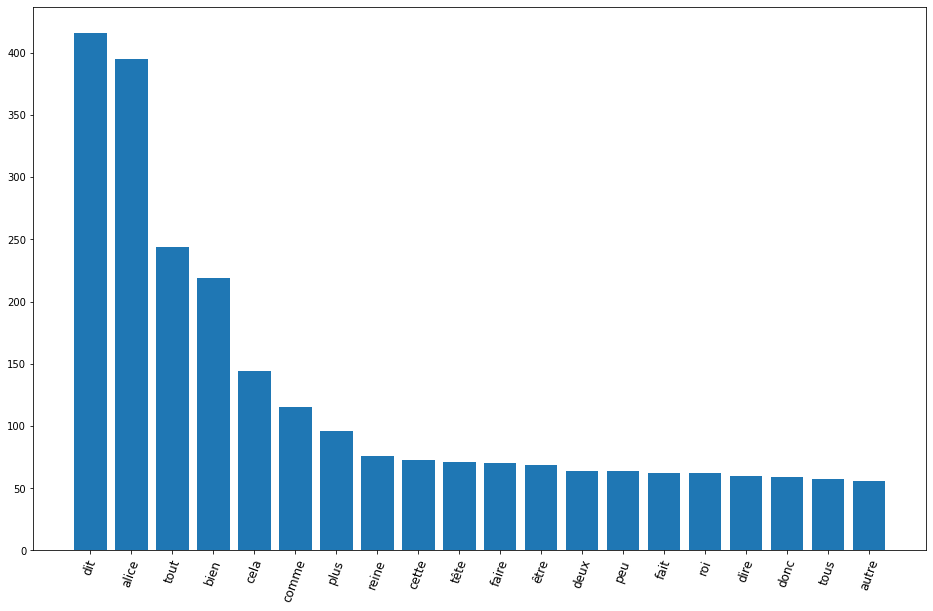

In [37]:
#Plotly Tools
#from plotly.offline import init_notebook_mode, iplot

################# TERM FREQUENCY ######################

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words=stopped).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df_chap_split[0], 20)

for word, freq in common_words:
    print(word, freq)


to_dict_words = dict(common_words)
#to_dict

plt.bar(*zip(*to_dict_words.items()))
plt.xticks(rotation=70)
plt.xticks(fontsize=12)
plt.show()

dit alice 109
fausse tortue 53
dit roi 33
pensa alice 23
lapin blanc 22
dit chapelier 22
dit griffon 20
peut être 19
eh bien 19
quelque chose 18
dit duchesse 18
dit fausse 18
tout monde 17
dit chenille 16
tout coup 15
dit reine 15
dit chat 12
cela fait 11
alice tout 11
voudrais bien 11


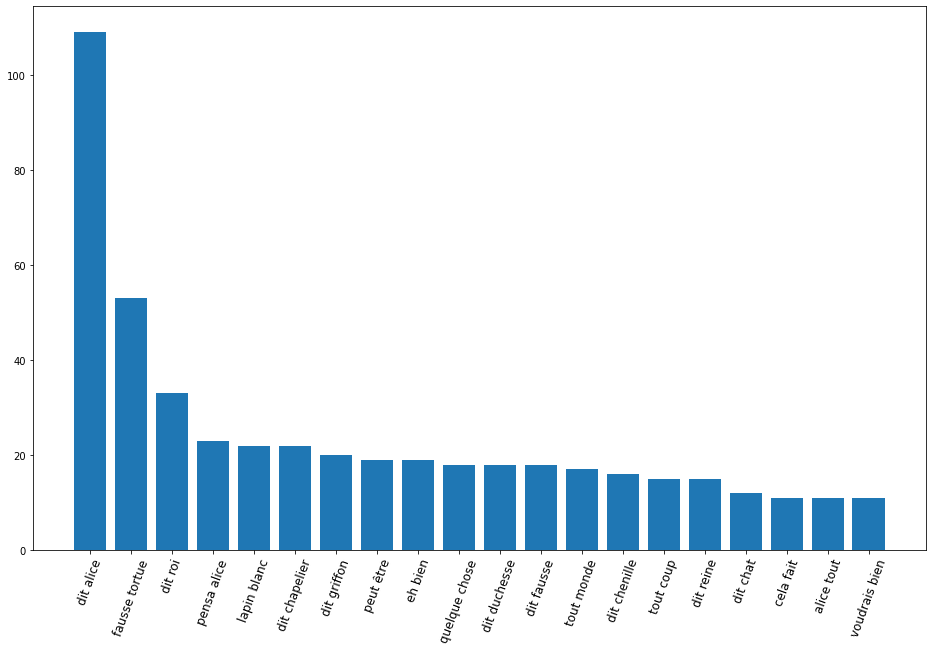

In [39]:
#Plotly Tools
#from plotly.offline import init_notebook_mode, iplot

################# BIGRAMS ######################

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stopped).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df_chap_split[0], 20)

for word, freq in common_bigrams:
    print(word, freq)


to_dict = dict(common_bigrams)
#to_dict

plt.bar(*zip(*to_dict.items()))
plt.xticks(rotation=70)
plt.xticks(fontsize=12)
plt.show()


dit fausse tortue 18
dit alice tout 8
petite clef or 6
tournant vers alice 5
non dit alice 4
cela va sans 4
va sans dire 4
tout aussi bien 4
tous côtés comme 4
dit alice très 4
répondit fausse tortue 4
quand tout coup 3
tout juste temps 3
chats mangent chauves 3
mangent chauves souris 3
dit alice vivement 3
voudrais bien avoir 3
souris souris souris 3
dit alice voix 3
bout quelques instants 3


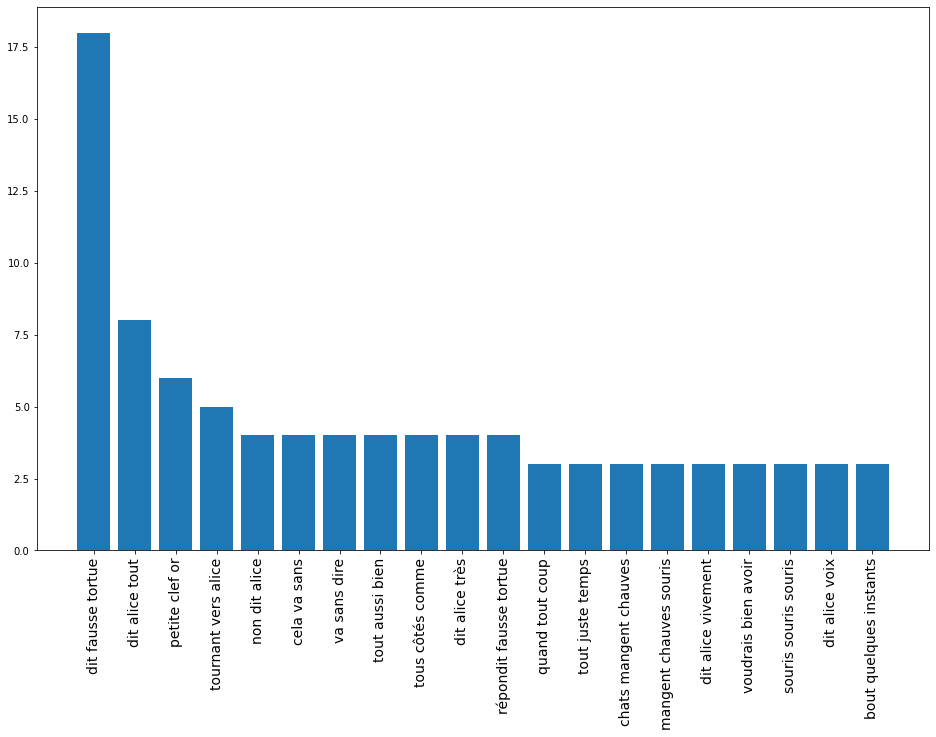

In [40]:
################# TRIGRAMS ######################

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stopped).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_trigrams = get_top_n_trigram(df_chap_split[0], 20)
#print(common_trigrams)

for word, freq in common_trigrams:
    print(word, freq)


to_dict_tri = dict(common_trigrams)
#to_dict

plt.bar(*zip(*to_dict_tri.items()))
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.show()




cela va sans dire 4
chats mangent chauves souris 3
pourriez dire tout aussi 3
dire tout aussi bien 3
colimaçon danse entre danse 3
danse entre danse sautons 3
entre danse sautons dansons 3
danse sautons dansons avant 3
sautons dansons avant faire 3
dansons avant faire plongeon 3
plonger soupière cette vaste 3
soupière cette vaste cuillère 3
cette vaste cuillère bonheur 3
vaste cuillère bonheur réjouit 3
cuillère bonheur réjouit cœur 3
dit roi lapin blanc 3
environ deux pieds haut 2
voudrais bien avoir tant 2
souris souris souris souris 2
dit alice voix caressante 2


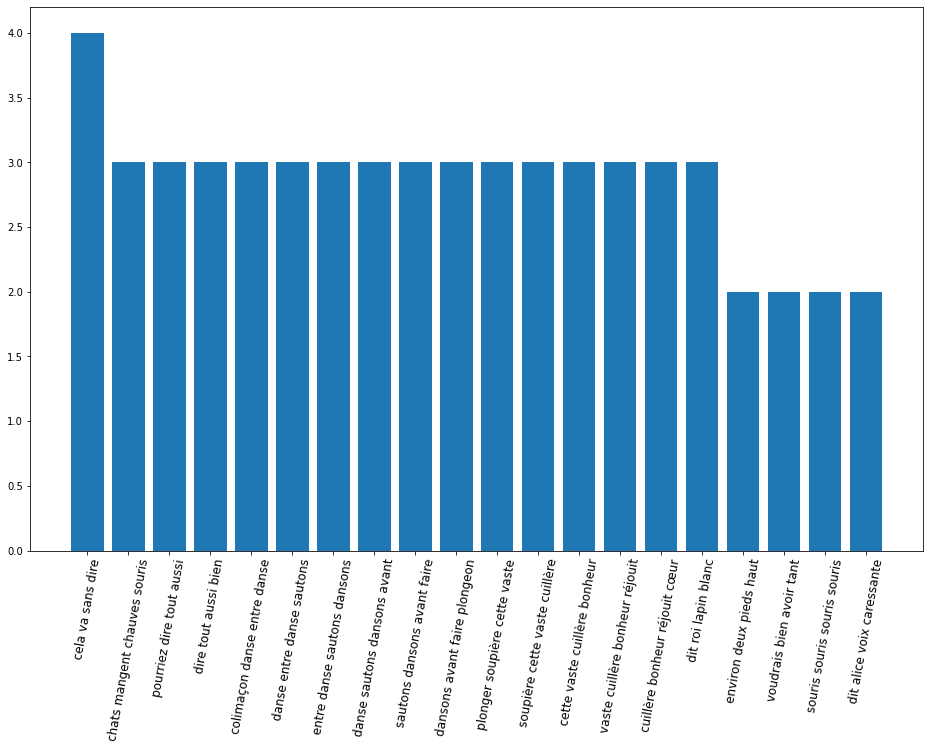

In [41]:
################# QUADRIGRAMS ######################

def get_top_n_quadrigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4, 4), stop_words=stopped).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_quadrigrams = get_top_n_quadrigram(df_chap_split[0], 20)

for word, freq in common_quadrigrams:
    print(word, freq)



to_dict_quadri = dict(common_quadrigrams)
#to_dict

plt.bar(*zip(*to_dict_quadri.items()))
plt.xticks(rotation=80)
plt.xticks(fontsize=12)
plt.show()


(13, 12)


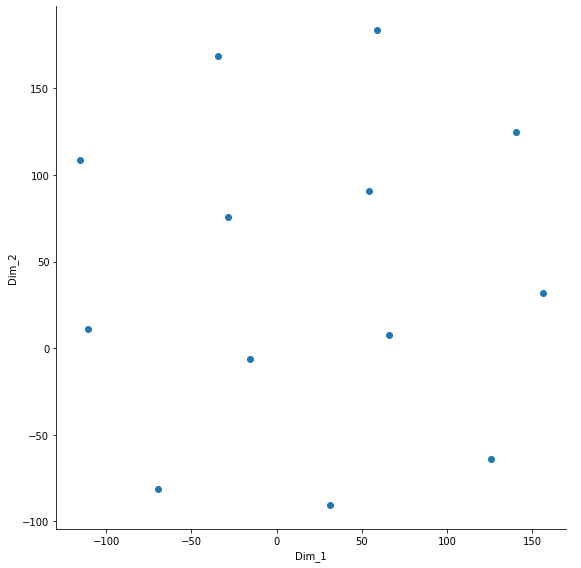

In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import seaborn as sn
#from seaborn import labels

standardized_data = StandardScaler().fit_transform(lsa_topic_matrix)

print(standardized_data.shape)
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:40000,:]
#labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
sn.FacetGrid(tsne_df, height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


In [43]:
#top_n_words_lsa = get_top_n_words(10, lsa_keys,
#                                document_term_matrix, count_vectorizer)

for i in range(1, len(lsa_topic_matrix)):
  print("Topic {}: {}".format(i, lsa_topic_matrix[i]))


Topic 1: [ 54.75680013  32.78745227  -5.78940912   0.4052265   -7.87383281
  -4.31189836   7.06943989   7.80659294 -19.13335337  -5.54612108
  13.7249868   21.19586823]
Topic 2: [ 59.29305285  29.41349699 -10.48205952   0.45396298  -6.76896385
   2.61385133  -0.69595372  22.82658687 -11.69189777  -5.78591043
 -16.76999372 -17.5926687 ]
Topic 3: [51.62753199  3.2708426  -0.24842734  5.52370308 -2.63245939  9.39927813
 -7.0190144  26.59588045 27.84712914  6.08656727 -1.31256763 12.33738586]
Topic 4: [ 66.93402873  43.23714235  -7.84527095  -0.91913318 -15.65871819
 -12.17361873   9.62056524 -21.95024015  18.91885647   3.4602402
   1.33582299  -5.962437  ]
Topic 5: [ 74.87509105   7.81126502  -4.92518817  11.1912593    4.93452656
  39.6855411  -11.13795171 -18.77886672  -3.94774133  -2.34726517
  -5.7018568    4.19596255]
Topic 6: [ 88.29742521  10.13117454  -2.48970061  -2.50603534  38.69577234
 -20.13863639 -23.57915852  -2.92159835  -0.90864494   1.99670854
   0.33809089   0.2801245 ]


In [44]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50,
                     learning_rate=100, n_iter=2000, verbose=1,
                     random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)


[t-SNE] Computing 12 nearest neighbors...
[t-SNE] Indexed 13 samples in 0.001s...
[t-SNE] Computed neighbors for 13 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 13 / 13
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.089165
[t-SNE] KL divergence after 1000 iterations: 0.887461


In [46]:
# CHAPTER SPLIT
corpus = chap_split
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


print(X.toarray())

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
print(type(vectorizer2))

X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())


['_a', '_avant', '_buvez', '_c', '_cela_', '_d', '_dragées_', '_elle_', '_j', '_l', '_la', '_les', '_maître', '_moins_', '_morale_', '_nous', '_passant', '_plus_', '_poison_', '_que', '_quelque', '_tous', '_toute', '_toutes', '_un_', '_vous', '_à', 'abandonner', 'abattue', 'aboiement', 'aboiements', 'abondance', 'abord', 'aboyant', 'absence', 'absolument', 'accablé', 'accepter', 'accident', 'accompagné', 'accourait', 'accoutumer', 'accrocha', 'accusation', 'accusé', 'accès', 'accès_', 'acte', 'ada', 'addition', 'adieu', 'admirablement', 'adoption', 'adoucissent', 'adressa', 'adressais', 'adressait', 'adressant', 'adresse', 'adresser', 'adressée', 'affaire', 'affaires', 'affairé', 'affection', 'afin', 'agenouilla', 'agit', 'agitait', 'agité', 'agitée', 'agripper', 'agréable', 'ah', 'ai', 'aide', 'aider', 'aie', 'aies', 'aiglon', 'aigre', 'aigrit', 'aigu', 'aiguille', 'aigus', 'ailes', 'aille', 'ailleurs', 'aimait', 'aimant', 'aime', 'aiment', 'aimer', 'aimerais', 'aimeriez', 'aimez', 'a